<a href="https://colab.research.google.com/github/wisrovi/SAM/blob/master/RedesNeuronalesArduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio solucionar

## Crear Reglas juego ejercicio

In [1]:
setPoint = 20

actuador = {
    1 : "Ventilador",
    2 : "Lampara calor"
}

estadosActuadores = {
    1 : "ON",
    0 : "OFF"
}

sensores = {
    1 : "Temperatura"
}

import random

def FuncionRespuesta(entrada):
  salida1 = 0    #Ventilador
  salida2 = 0    #calentador
  if entrada > setPoint:
    salida1 = 1
    salida2 = 0
  elif entrada < setPoint:
    salida1 = 0
    salida2 = 1
  else:
    salida1 = 0
    salida2 = 0
  return salida1, salida2

def temperaturaAleatoria():
  return random.randint(10,45)

def GenerarDatos(cantidad):
  training_data = []
  target_data = []
  valorPasado = 0
  for i in range(cantidad):
    temperatura = temperaturaAleatoria()
    if valorPasado != temperatura:
      valorPasado = temperatura
      training_data.append([temperatura])
      salida1, salida2 = FuncionRespuesta(temperatura) 
      target_data.append([salida1, salida2])
    else:
      i -= 1
  return training_data, target_data

def NormalizarDatoIndividual(dato):
  return dato

class NormalizarDato:
  def __init__(self, max, min):
    self.max = max[0]
    self.min = min[0]
  
  def desnomalizar(self, x):
    punto_inferior = (-0.99, self.min)
    punto_superior = (0.99, self.max)
    m = (punto_superior[1] - punto_inferior[1])/(punto_superior[0]-punto_inferior[0])
    b = 45 - m*0.99
    y = round(m*x + b,2)
    return y

  def Normalizar(self, y):
    punto_inferior = (-0.99, self.min)
    punto_superior = (0.99, self.max)
    m = (punto_superior[1] - punto_inferior[1])/(punto_superior[0]-punto_inferior[0])
    b = 45 - m*0.99
    x = round((y-b)/m, 2)
    return x



training, target = GenerarDatos(5000)

# normalizar datos entrada
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
matrix_entrada_normalizado = scaler.fit_transform(training)

ddi = NormalizarDato(max(training), min(training))
print(   ddi.desnomalizar(0.22 ) , ddi.Normalizar(ddi.desnomalizar(0.22 ))   )

ddo = NormalizarDato(max(target), min(target))
matrix_salidas_normalizada = scaler.fit_transform(target)

matrix_entrada = training
matrix_salidas = target

31.39 0.22


## Configuro entradas (X) y salidas (y)

In [2]:
# matriz entrada
use_demo = False
if use_demo:
    matrix_entrada = [
                        [0, 0],   # sin obstaculos
                        [0, 1],   # sin obstaculos
                        [0, -1],  # sin obstaculos
                        [0.5, 1], # obstaculo detectado a derecha
                        [0.5,-1], # obstaculo a izq
                        [1,1],    # demasiado cerca a derecha
                        [1,-1]    # demasiado cerca a izq
                    ]   

    matrix_salidas = [
                        [0,1],    # avanzar
                        [0,1],    # avanzar
                        [0,1],    # avanzar
                        [-1,1],   # giro izquierda
                        [1,1],    # giro derecha
                        [0,-1],   # retroceder
                        [0,-1]    # retroceder
                    ]                   

## Configuro capas ocultas

In [3]:
neuronas_capa_intermedias = 5

## Configuro funcion activación transferencia

In [4]:
funcion_transferencia = 'tanh'

## epocas

In [5]:
epocas_usar = 500000

# Red Neuronal

## Clases para Red Neuronal 

In [6]:
import numpy as np

class FuncionesTransferenciaRNA:
  def __init_(self):
    pass

  def sigmoid(self, x):
      return 1.0/(1.0 + np.exp(-x))

  def sigmoid_derivada(self, x):
      return sigmoid(x)*(1.0-sigmoid(x))

  def tanh(self, x):
      return np.tanh(x)

  def tanh_derivada(self, x):
      return 1.0 - x**2

# Creamos la clase 
class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        ft = FuncionesTransferenciaRNA()

        if activation == 'sigmoid':
            self.activation = ft.sigmoid
            self.activation_prime = ft.sigmoid_derivada
        elif activation == 'tanh':
            self.activation = ft.tanh
            self.activation_prime = ft.tanh_derivada

        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [2,3,4]
        # rando de pesos varia entre (-1,1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # asigno aleatorios a capa de salida
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # Calculo la diferencia en la capa de salida y el valor obtenido
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            # Empezamos en el segundo layer hasta el ultimo
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            # invertir
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiplcar los delta de salida con las activaciones de entrada 
            #    para obtener el gradiente del peso.
            # 2. actualizo el peso restandole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x): 
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
          for j in self.weights[i]:
              print(j)

    def get_weights(self):
        return self.weights
    
    def get_deltas(self):
        return self.deltas

## Configuro el modelo de Red Neuronal

In [7]:
vector_capas_ocultas = [ len(matrix_entrada[0])    ,       neuronas_capa_intermedias,   len(matrix_salidas[0])   ]  # [2,3,2]

nn = NeuralNetwork(vector_capas_ocultas,activation =funcion_transferencia)

## Entrenar el modelo 

In [8]:
X = np.array(matrix_entrada)  
y = np.array(matrix_salidas) 


nn.fit(X, y, learning_rate=0.03,epochs=epocas_usar)

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
epochs: 110000
epochs: 120000
epochs: 130000
epochs: 140000
epochs: 150000
epochs: 160000
epochs: 170000
epochs: 180000
epochs: 190000
epochs: 200000
epochs: 210000
epochs: 220000
epochs: 230000
epochs: 240000
epochs: 250000
epochs: 260000
epochs: 270000
epochs: 280000
epochs: 290000
epochs: 300000
epochs: 310000
epochs: 320000
epochs: 330000
epochs: 340000
epochs: 350000
epochs: 360000
epochs: 370000
epochs: 380000
epochs: 390000
epochs: 400000
epochs: 410000
epochs: 420000
epochs: 430000
epochs: 440000
epochs: 450000
epochs: 460000
epochs: 470000
epochs: 480000
epochs: 490000


## Graficar datos entrenamiento

### obtener deltas (comparación aprendizaje y error)

In [9]:
deltas = nn.get_deltas()
deltas

[[array([-0.00000000e+00,  0.00000000e+00, -2.51385594e-09, -1.45764724e-14,
          0.00000000e+00, -1.99830541e-12]),
  array([ 0.34376617, -0.36428442])],
 [array([-6.56545130e-17,  0.00000000e+00, -1.09631900e-07, -4.32108278e-12,
          0.00000000e+00, -2.36270125e-10]),
  array([ 0.29192906, -0.3762329 ])],
 [array([-2.95851771e-12, -0.00000000e+00, -1.27866775e-05, -5.39100869e-09,
          8.10231883e-14, -9.44617559e-08]),
  array([ 0.25255617, -0.38349735])],
 [array([ 7.59132078e-06, -5.40667350e-10,  1.43385992e-02,  1.23473391e-04,
         -2.07121264e-06,  4.67540812e-04]),
  array([-0.38140287,  0.29887335])],
 [array([ 3.49961806e-08, -6.64673598e-13,  1.51072634e-03,  3.19617223e-06,
         -9.09346011e-09,  2.16693032e-05]),
  array([-0.38472781,  0.26060739])],
 [array([-0.00000000e+00,  0.00000000e+00, -4.47391286e-08, -5.31787807e-13,
          0.00000000e+00, -3.99240315e-11]),
  array([ 0.32429615, -0.38085164])],
 [array([ 8.81447976e-07, -4.75343325e-1

### Graficar Deltas

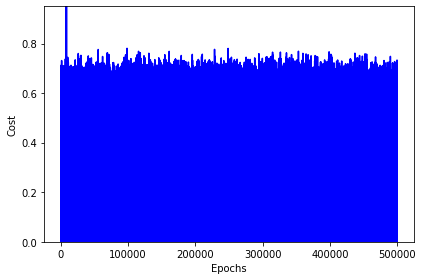

In [10]:
import matplotlib.pyplot as plt

valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index=index+1

error_luego_entrenamiento = abs( round(valores[-1:][0]*100, 2) ) 
plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 0.95])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()


***Para predecir uso: nn.predict(e) # e = entrada evaluar***

# Probar modelo

***Para predecir uso: nn.predict(e) # e = entrada evaluar***

In [18]:
index=0
conteo_error = 0
for e in X:
    [ventilador, calentador] = nn.predict(e)
    ventilador = round(ventilador)
    calentador = round(calentador)
    if y[index][0] != ventilador and y[index][1] != calentador:
        conteo_error = conteo_error + 1
    #print("X:",e, "y:",y[index],"Network:",[ventilador, calentador])
    index=index+1

print(conteo_error*100/5000)

27.88


In [12]:
#di = np.array([ddi.Normalizar(25)])
di = np.array([12])

[ventilador, calentador] = nn.predict(di)

if ventilador > 0.8:
  print("ventilador ON")
else:
  print("ventilador OFF")

if calentador > 0.8:
  print("calentador ON")
else:
  print("calentador OFF")

ventilador OFF
calentador OFF


# Obtener vectores de Pesos

## Ver error

In [13]:
print("Error: {}%".format(error_luego_entrenamiento))

Error: 9.17%


## Obtener vectores a poner en Arduino

In [14]:
def RedondWeight(pesos):
    return round(pesos, 4)

def to_str(name, W):
    pesos = W.tolist()

    pesos_redondeados = list()
    for pes in pesos:
        pesos_capa = list()
        for pesos_neurona in pes:
            pesos_capa.append(RedondWeight(pesos_neurona))
        pesos_redondeados.append(pesos_capa)
    #print(pesos_redondeados)
    s = str(pesos_redondeados).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [15]:
# Obtenermos los pesos entrenados para poder usarlos en el codigo de arduino
pesos = nn.get_weights();

print('// Reemplazar estas lineas en tu codigo arduino:')
print('// float HiddenWeights ...')
print('// float OutputWeights ...')
print('// Con lo pesos entrenados.')
print('\n')
print(to_str('HiddenWeights', pesos[0]))
print(to_str('OutputWeights', pesos[1]))

// Reemplazar estas lineas en tu codigo arduino:
// float HiddenWeights ...
// float OutputWeights ...
// Con lo pesos entrenados.


float HiddenWeights[2][6] = {{-0.4759, -0.6326, 0.8747, -0.3895, -0.338, 0.5346}, {0.5628, -0.7211, -0.5995, 0.6567, 1.039, 0.5441}};
float OutputWeights[6][2] = {{0.2196, 0.1137}, {-0.2625, 0.5647}, {-0.0419, -0.0596}, {-0.2601, 0.5542}, {0.9784, -0.226}, {-0.2507, 0.241}};
